# Feature Engineering

Feature engineering is the process of transforming raw data into features that are suitable for machine learning models. In other words, it is the process of selecting, extracting, and transforming the most relevant features from the available data to build more accurate and efficient machine learning models.

The success of machine learning models heavily depends on the quality of the features used to train them. Feature engineering involves a set of techniques that enable us to create new features by combining or transforming the existing ones. These techniques help to highlight the most important patterns and relationships in the data, which in turn helps the machine learning model to learn from the data more effectively.

## Explore The Data: What Data Are We Using?

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class (1st, 2nd, or 3rd)
- **Sex** (str) - Gender of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Read In Data

In [1]:
# Read in the data from the data folder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import joblib
%matplotlib inline
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
from statsmodels.graphics.gofplots import qqplot

In [2]:
titanic = pd.read_csv("C:/Users/Prath/OneDrive/Documents/Datasets/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check the number of rows and columns in the data
titanic.shape

(891, 12)

In [4]:
# Check the type of data stored in each column
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
# See the distribution of our target variable
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Explore Continuous Features

In [6]:
# Drop all categorical features
cat_feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Cabin', 'Embarked']
titanic.drop(cat_feat, axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [7]:
# Look at the general distribution of these features
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Look at the correlation matrix
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
# Look at fare by different passenger class levels
titanic.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [10]:
def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(titanic.groupby('Survived')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    survived = titanic[titanic['Survived']==1][feature]
    not_survived = titanic[titanic['Survived']==0][feature]
    tstat, pval = stats.ttest_ind(survived, not_survived, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [11]:
# Look at the distribution of each feature at each level of the target variable
for feature in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    describe_cont_feature(feature)


*** Results for Pclass ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0
t-statistic: -10.3, p-value: 2.91e-23
None

*** Results for Age ***
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
t-statistic: nan, p-value: nan
None

*** Results for SibSp ***
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0
t-statistic: -1.2, p-value: 0.233
None

*** Results for Parch ***
          count

In [12]:
# Look at the average value of each feature based on whether Age is missing
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


### Plot Continuous Features

C:\Users\Prath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


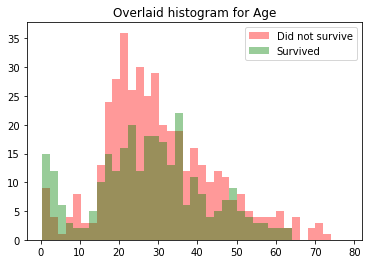

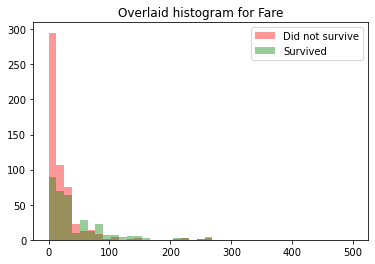

In [13]:
# Plot overlaid histograms for continuous features
for i in ['Age', 'Fare']:
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

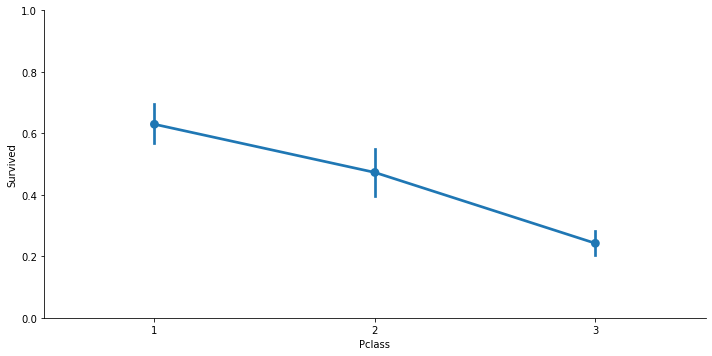

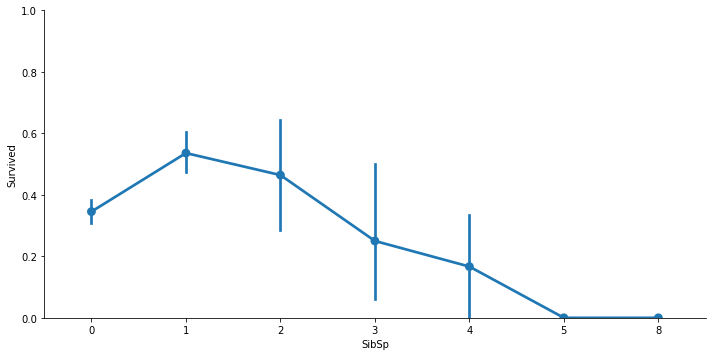

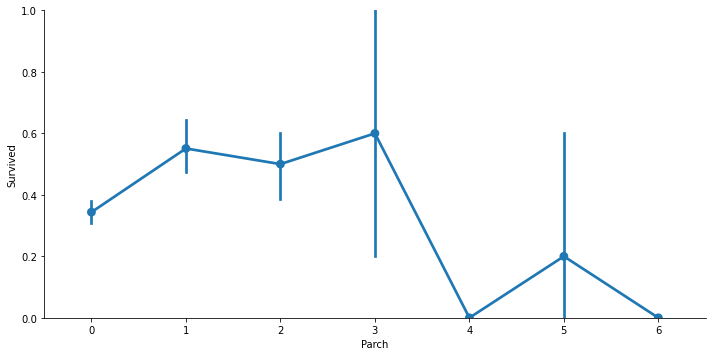

In [14]:
# Generate categorical plots for ordinal features
for col in ['Pclass', 'SibSp', 'Parch']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )
    plt.ylim(0, 1)

(0.0, 1.0)

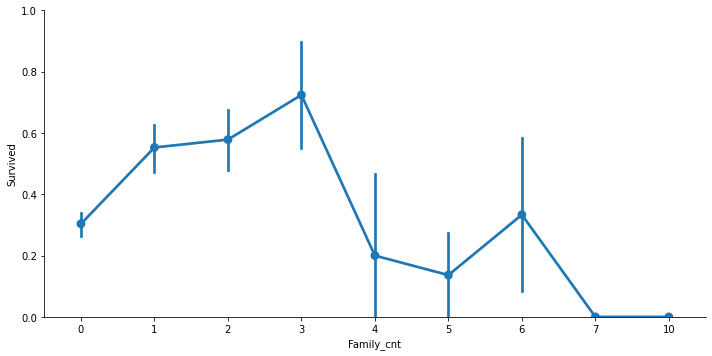

In [15]:
# Create a new family count feature
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']
sns.catplot(x='Family_cnt', y='Survived', data=titanic, kind='point', aspect=2, )
plt.ylim(0, 1)

### Explore Categorical Features

In [16]:
titanic = pd.read_csv("C:/Users/Prath/OneDrive/Documents/Datasets/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Check if there are any missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
# Explore the number of unique values for each feature
for col in titanic.columns:
    print('{}: {} unique values'.format(col, titanic[col].nunique()))

PassengerId: 891 unique values
Survived: 2 unique values
Pclass: 3 unique values
Name: 891 unique values
Sex: 2 unique values
Age: 88 unique values
SibSp: 7 unique values
Parch: 7 unique values
Ticket: 681 unique values
Fare: 248 unique values
Cabin: 147 unique values
Embarked: 3 unique values


In [19]:
# Check survival rate by gender
titanic.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [20]:
# Check survival rate by the port departed from
titanic.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.814769,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,28.089286,0.428571,0.168831,13.276030
S,449.527950,0.336957,2.350932,29.445397,0.571429,0.413043,27.079812


In [21]:
# Is Cabin missing at random?
titanic.groupby(titanic['Cabin'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin,,,,,,,
False,455.401961,0.666667,1.196078,35.829297,0.441176,0.436275,76.141504
True,443.208151,0.299854,2.639010,27.555293,0.547307,0.365357,19.157325


In [22]:
# Look at unique values for the Ticket feature
titanic['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [23]:
# Create a title feature by parsing passenger name
titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [24]:
# Look at survival rate by title
titanic.pivot_table('Survived', index=['Title', 'Sex'], aggfunc=['count', 'mean'])

count      mean
                    Survived  Survived
Title        Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000

### Plot Categorical Features

In [25]:
# Create a title feature by parsing passenger name and create a cabin indicator variable
titanic['Title_Raw'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic['Title'] = titanic['Title_Raw'].apply(lambda x: x if x in ['Master', 'Miss', 'Mr', 'Mrs'] else 'Other')
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Raw,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,0


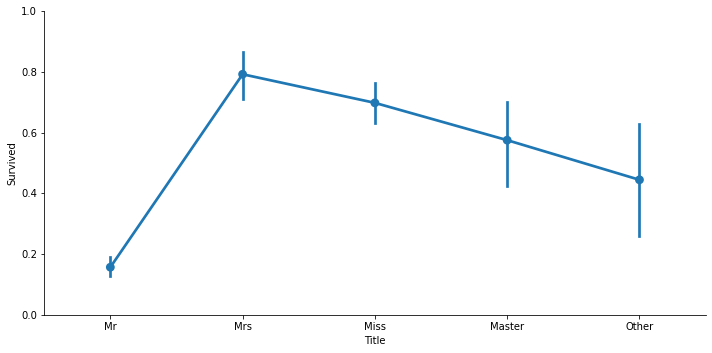

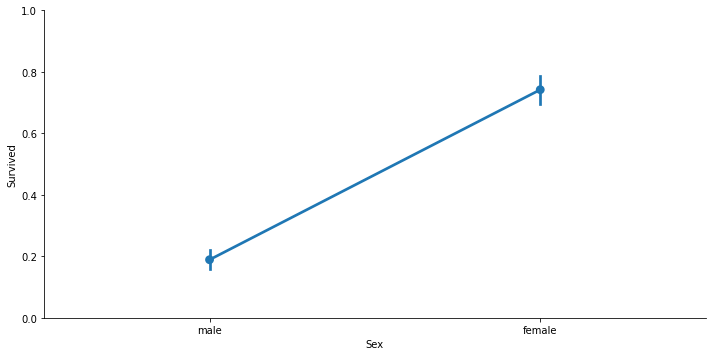

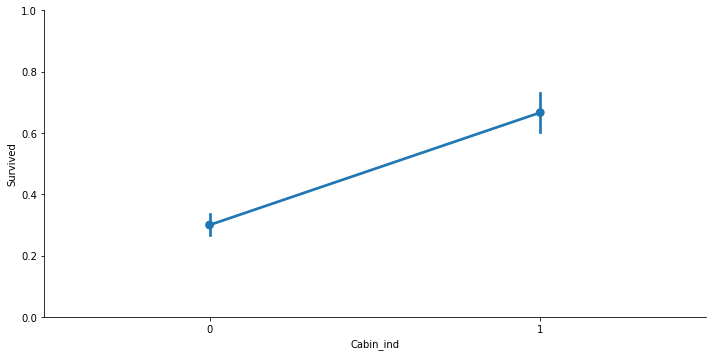

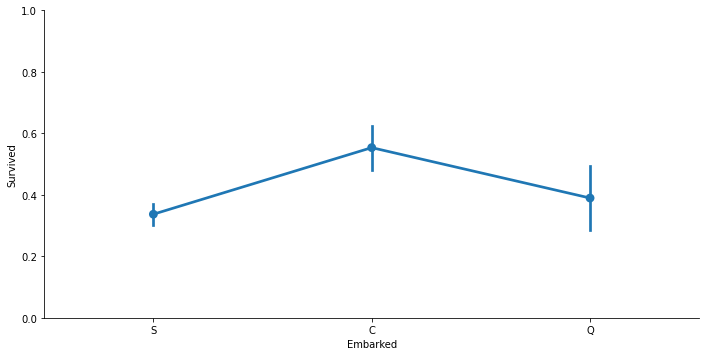

In [26]:
# Generate categorical plots for features
for col in ['Title', 'Sex', 'Cabin_ind', 'Embarked']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )
    plt.ylim(0, 1)

In [27]:
# Split embarked by whether the passenger had a cabin
titanic.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


## Creating And Cleaning Features: Treat Missing Values In The Data

Three primary methods to treat missing values:
1. Impute to the median or mean of the feature
2. Model that feature to predict the missing values
3. Assign it some default value (`Other` or `-999`)

In [28]:
# Check where we have missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Title_Raw        0
Cabin_ind        0
dtype: int64

### Fill Missing For `Age`

In [29]:
# Check if Age appears to be missing at random
titanic.groupby(titanic['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_ind
Age,,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.259104
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,0.107345


In [30]:
# Fill in missing values for the Age feature
titanic['Age_clean'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
Title_Raw        0
Cabin_ind        0
Age_clean        0
dtype: int64

In [31]:
# Take a look at the data one more time
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Raw,Cabin_ind,Age_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,0,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,1,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,0,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,1,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,0,35.000000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,Mr,0,29.699118
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,Mr,1,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,Master,0,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,Mrs,0,27.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,Mrs,0,14.000000


### Fill Missing For `Embarked`

In [32]:
# Fill in missing values for the Embarked feature
titanic['Embarked_clean'] = titanic['Embarked'].fillna('O')
titanic.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Title               0
Title_Raw           0
Cabin_ind           0
Age_clean           0
Embarked_clean      0
dtype: int64

In [33]:
# Write out data with missing values cleaned up
titanic.to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/titanic_no_missing.csv', index=False)

### Remove Outliers

In [34]:
# See where outliers might be an issue
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_ind,Age_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956,29.699118
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.420397,13.002015
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,22.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,29.699118
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000,35.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,80.000000


In [35]:
def detect_outlier(feature):
    outliers = []
    data = titanic[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))

In [36]:
# Cap features
titanic['Age_clean'].clip(upper=titanic['Age_clean'].quantile(.99), inplace=True)
titanic['Fare_clean'] = titanic['Fare'].clip(upper=titanic['Fare'].quantile(.99))

In [37]:
# Describe the dataframe again to make sure the capping was successful
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_ind,Age_clean,Fare_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.228956,29.640195,31.224767
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.420397,12.820616,42.524125
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,22.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,29.699118,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000,35.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,65.000000,249.006220


In [38]:
# Write out capped data
titanic.to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/titanic_capped.csv', index=False)

C:\Users\Prath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


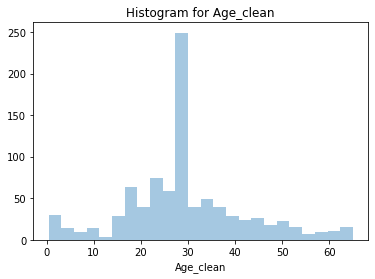

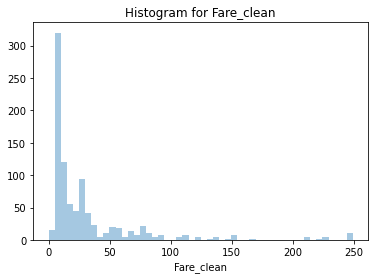

In [39]:
# Plot histogram for each continuous feature to see if a transformation is necessary
for feature in ['Age_clean', 'Fare_clean']:
    sns.distplot(titanic[feature], kde=False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

### Box-Cox Power Transformation

**Base Form** $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |

**Example (Using Fare)**

| Original value    | Transformation           |           Transformation               |
|------|--------------------------|--------------------------|
| $$ 50 $$    | $$ \frac{1}{50^2} $$           |  $$ 0.0004 $$      |
| $$ 50 $$    | $$ \frac{1}{50} $$          | $$ 0.02 $$        |
| $$ 50 $$  | $$ \frac{1}{\sqrt{50}} $$ | $$ 0.14 $$ |
| $$ 50 $$     | $$ log(50) $$              | $$ 1.7 $$             |
| $$ 50 $$   | $$ \sqrt{50} $$ | $$ 7.07 $$           |
| $$ 50 $$     | $$ 50 $$              | $$ 50 $$                  |
| $$ 50 $$     | $$ 50^2 $$           | $$ 2500 $$                |

**Process**

1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution


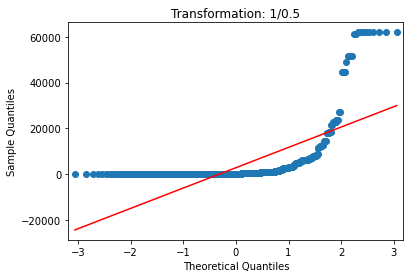

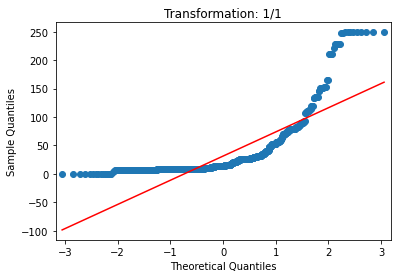

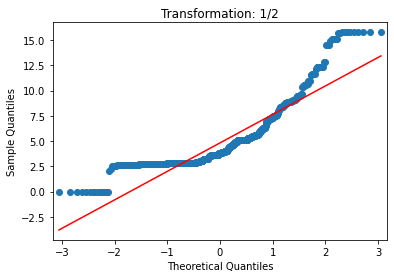

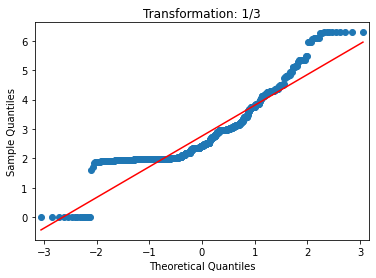

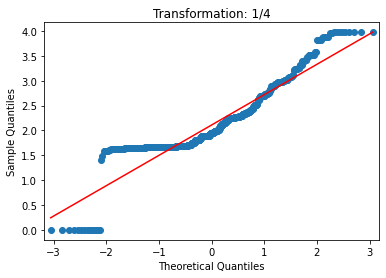

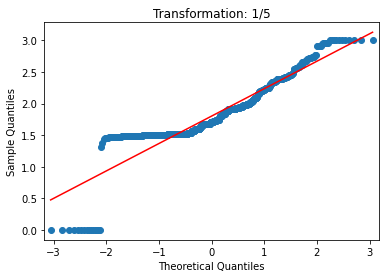

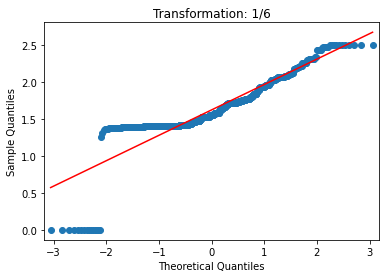

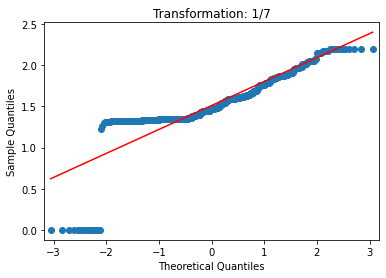

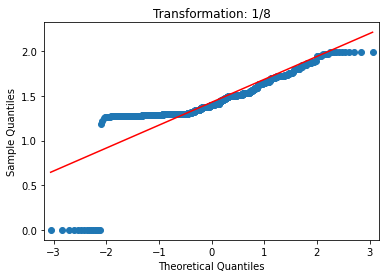

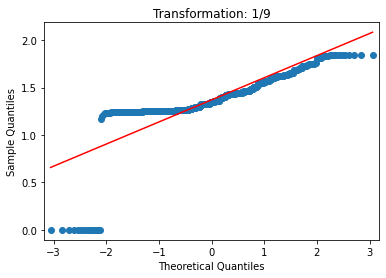

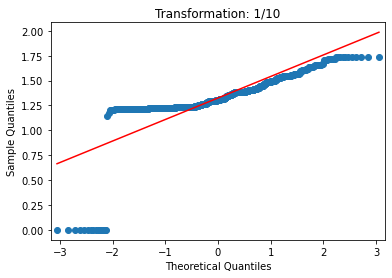

In [40]:
# Generate QQ plots
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = titanic['Fare_clean']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

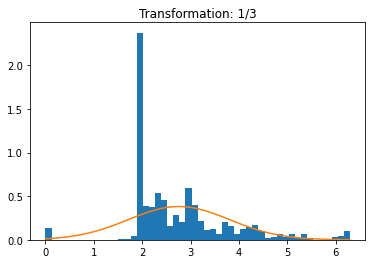

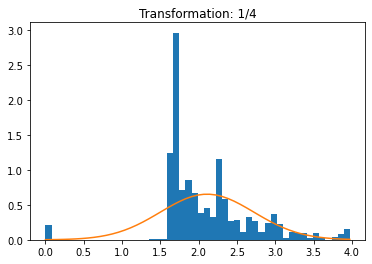

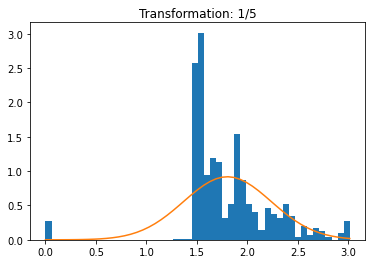

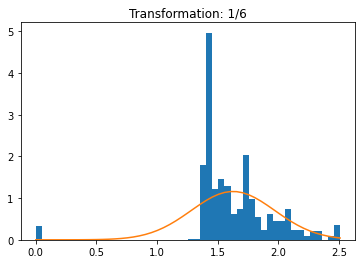

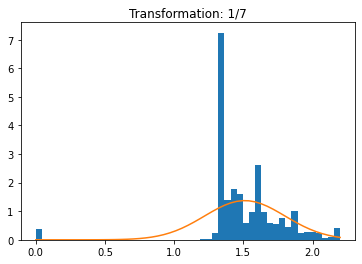

In [41]:
# Box-Cox transformation
for i in [3, 4, 5, 6, 7]:
    data_t = titanic['Fare_clean']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

In [42]:
# Create the new transformed feature
titanic['Fare_clean_tr'] = titanic['Fare_clean'].apply(lambda x: x**(1/5))
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Raw,Cabin_ind,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,0,22.0,S,7.2500,1.486167
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,1,38.0,C,71.2833,2.347457
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,0,26.0,S,7.9250,1.512864
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,1,35.0,S,53.1000,2.213191
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,0,35.0,S,8.0500,1.517606


In [43]:
# Create new CSV with updated data
titanic.to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/titanic_transformed.csv', index=False)

### Create New Title Feature

In [44]:
# Create a title feature by parsing passenger name
titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Raw,Cabin_ind,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,0,22.0,S,7.2500,1.486167
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,1,38.0,C,71.2833,2.347457
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,0,26.0,S,7.9250,1.512864
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,1,35.0,S,53.1000,2.213191
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,0,35.0,S,8.0500,1.517606


In [45]:
# Look at survival rate by title
titanic.pivot_table('Survived', index=['Title', 'Sex'], aggfunc=['count', 'mean'])

count      mean
                    Survived  Survived
Title        Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000

In [46]:
# Create new CSV with updated data
titanic.to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/titanic_title.csv', index=False)

### Create Indicator Variable For `Cabin`

In [47]:
# What would an indicator variable for Cabin look like?
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [48]:
# Create indicator feature
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [49]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Raw,Cabin_ind,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Mr,0,22.0,S,7.2500,1.486167
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Mrs,1,38.0,C,71.2833,2.347457
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Miss,0,26.0,S,7.9250,1.512864
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Mrs,1,35.0,S,53.1000,2.213191
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Mr,0,35.0,S,8.0500,1.517606


In [50]:
# Create new CSV with updated data
titanic.to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/titanic_cabin_ind.csv', index=False)

### Combine `SibSp` & `Parch` Into New `Family_cnt` Feature

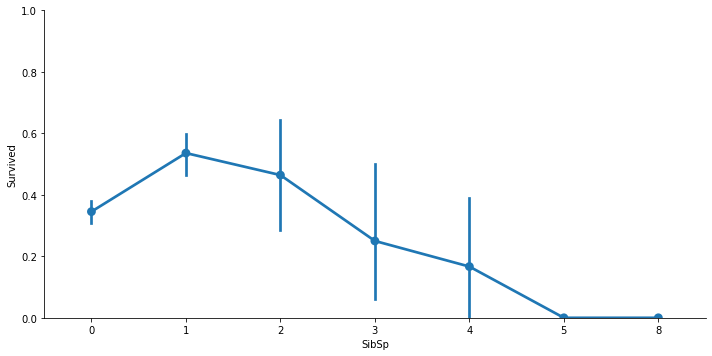

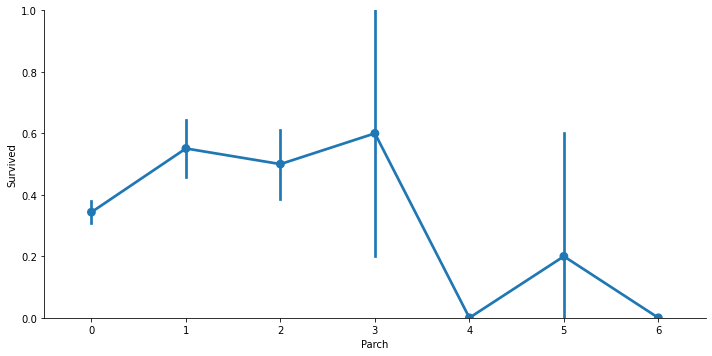

In [51]:
# Generate categorical plots for ordinal features
for col in ['SibSp', 'Parch']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )
    plt.ylim(0, 1)

(0.0, 1.0)

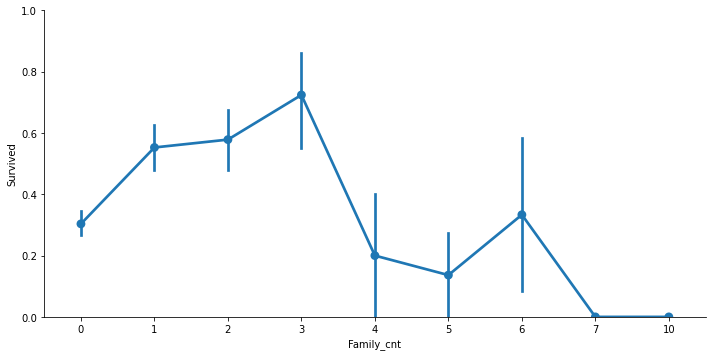

In [52]:
# Create a new family count feature
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']
sns.catplot(x='Family_cnt', y='Survived', data=titanic, kind='point', aspect=2, )
plt.ylim(0, 1)

In [53]:
# Create new CSV with updated data
titanic.to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/titanic_family_cnt.csv', index=False)

### Convert Categorical Features To Numeric

In [54]:
# Convert categorical features to numeric levels
for feature in ['Sex', 'Cabin', 'Embarked', 'Embarked_clean', 'Title', 'Title_Raw']:
    le = LabelEncoder()
    titanic[feature] = le.fit_transform(titanic[feature].astype(str))
    
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_Raw,Cabin_ind,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2,11,11,0,22.0,3,7.2500,1.486167,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,12,12,1,38.0,0,71.2833,2.347457,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2,8,8,0,26.0,3,7.9250,1.512864,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,12,12,1,35.0,3,53.1000,2.213191,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2,11,11,0,35.0,3,8.0500,1.517606,0


In [55]:
# Create new CSV with updated data
titanic.to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/titanic_numeric.csv', index=False)

### Split Into Train, Validation, And Test Set

In [56]:
# Drop unnecccessary features and split into training/test sets
features = titanic.drop(['PassengerId', 'Ticket', 'Name', 'Survived'], axis=1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Title_Raw,Cabin_ind,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Family_cnt
570,2,1,62.0,0,0,10.5000,147,2,11,11,0,62.0,3,10.5000,1.600434,0
787,3,1,8.0,4,1,29.1250,147,1,7,7,0,8.0,2,29.1250,1.962697,5
74,3,1,32.0,0,0,56.4958,147,2,11,11,0,32.0,3,56.4958,2.240801,0
113,3,0,20.0,1,0,9.8250,147,2,8,8,0,20.0,3,9.8250,1.579307,1
635,2,0,28.0,0,0,13.0000,147,2,8,8,0,28.0,3,13.0000,1.670278,0


In [57]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


In [58]:
X_train.to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/train_features.csv', index=False)
X_val.to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/val_features.csv', index=False)
X_test.to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/test_features.csv', index=False)

y_train.to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/train_labels.csv', index=False)
y_val.to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/val_labels.csv', index=False)
y_test.to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/test_labels.csv', index=False)

In [60]:
titanic_train_features = pd.read_csv('C:/Users/Prath/OneDrive/Documents/Datasets/train_features.csv')
titanic_val_features = pd.read_csv('C:/Users/Prath/OneDrive/Documents/Datasets/val_features.csv')
titanic_test_features = pd.read_csv('C:/Users/Prath/OneDrive/Documents/Datasets/test_features.csv')

### Standardize Features

In [65]:
# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(titanic_train_features)

StandardScaler()

In [69]:
# Scale the training, test, and validation sets
features = titanic_train_features.columns

titanic_train_features[features] = scaler.transform(titanic_train_features[features])
titanic_val_features[features] = scaler.transform(titanic_val_features[features])
titanic_test_features[features] = scaler.transform(titanic_test_features[features])

In [70]:
# Define the list of features to be used for each dataset
raw_original_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch', 'Fare',
                         'Cabin', 'Embarked']

cleaned_original_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch', 'Fare_clean',
                             'Cabin', 'Embarked_clean']

all_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch', 'Fare_clean', 'Fare_clean_tr',
                'Cabin', 'Cabin_ind', 'Embarked_clean', 'Title', 'Family_cnt']

reduced_features = ['Pclass', 'Sex', 'Age_clean', 'Family_cnt', 'Fare_clean_tr',
                    'Cabin_ind', 'Title']

In [74]:
# Write out final data for each feature set
titanic_train_features[raw_original_features].to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/train_features_raw.csv', index=False)
titanic_val_features[raw_original_features].to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/val_features_raw.csv', index=False)
titanic_test_features[raw_original_features].to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/test_features_raw.csv', index=False)

titanic_train_features[cleaned_original_features].to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/train_features_original.csv', index=False)
titanic_val_features[cleaned_original_features].to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/val_features_original.csv', index=False)
titanic_test_features[cleaned_original_features].to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/test_features_original.csv', index=False)

titanic_train_features[all_features].to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/train_features_all.csv', index=False)
titanic_val_features[all_features].to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/val_features_all.csv', index=False)
titanic_test_features[all_features].to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/test_features_all.csv', index=False)

titanic_train_features[reduced_features].to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/train_features_reduced.csv', index=False)
titanic_val_features[reduced_features].to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/val_features_reduced.csv', index=False)
titanic_test_features[reduced_features].to_csv('C:/Users/Prath/OneDrive/Documents/Datasets/test_features_reduced.csv', index=False)

### Move Labels To Proper Directory

In [75]:
# Read in all labels
titanic_train_labels = pd.read_csv('C:/Users/Prath/OneDrive/Documents/Datasets/train_labels.csv')
titanic_val_labels = pd.read_csv('C:/Users/Prath/OneDrive/Documents/Datasets/val_labels.csv')
titanic_test_labels = pd.read_csv('C:/Users/Prath/OneDrive/Documents/Datasets/test_labels.csv')

In [76]:
# Double-check the labels
titanic_train_labels

,Survived
0,1
1,0
2,1
3,0
4,1
...,...
529,1
530,0
531,0
532,1


In [77]:
train_features = pd.read_csv('C:/Users/Prath/OneDrive/Documents/Datasets/train_features_raw.csv')

<AxesSubplot:>

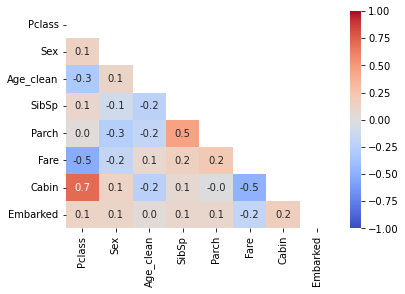

In [78]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix)

In [79]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [82]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}


cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, titanic_train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 32}

0.8 (+/-0.088) for {'max_depth': 2, 'n_estimators': 8}
0.775 (+/-0.123) for {'max_depth': 2, 'n_estimators': 16}
0.792 (+/-0.106) for {'max_depth': 2, 'n_estimators': 32}
0.794 (+/-0.13) for {'max_depth': 2, 'n_estimators': 64}
0.792 (+/-0.117) for {'max_depth': 2, 'n_estimators': 128}
0.794 (+/-0.109) for {'max_depth': 2, 'n_estimators': 256}
0.796 (+/-0.102) for {'max_depth': 2, 'n_estimators': 512}
0.818 (+/-0.099) for {'max_depth': 4, 'n_estimators': 8}
0.807 (+/-0.088) for {'max_depth': 4, 'n_estimators': 16}
0.809 (+/-0.113) for {'max_depth': 4, 'n_estimators': 32}
0.807 (+/-0.103) for {'max_depth': 4, 'n_estimators': 64}
0.82 (+/-0.1) for {'max_depth': 4, 'n_estimators': 128}
0.822 (+/-0.093) for {'max_depth': 4, 'n_estimators': 256}
0.82 (+/-0.105) for {'max_depth': 4, 'n_estimators': 512}
0.837 (+/-0.08) for {'max_depth': 8, 'n_estimators': 8}
0.846 (+/-0.077) for {'max_depth': 8, 'n_estimators': 16}
0.847 (+/-0.07) for {'max_

### Feature Importance

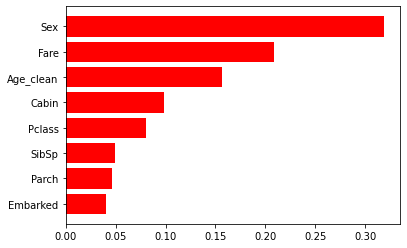

In [83]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

In [84]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, 'C:/Users/Prath/OneDrive/Documents/Datasets/mdl_raw_original_features.pkl')

['C:/Users/Prath/OneDrive/Documents/Datasets/mdl_raw_original_features.pkl']

In [85]:
# Read in models
models = {}

for mdl in ['raw_original', 'cleaned_original', 'all', 'reduced']:
    models[mdl] = joblib.load('../../../models/mdl_{}_features.pkl'.format(mdl))

C:\Users\Prath\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Prath\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Evaluate Models On The Validation Set

In [86]:
val_features_raw = pd.read_csv('C:/Users/Prath/OneDrive/Documents/Datasets/val_features_raw.csv')
val_features_original = pd.read_csv('C:/Users/Prath/OneDrive/Documents/Datasets/val_features_original.csv')
val_features_all = pd.read_csv('C:/Users/Prath/OneDrive/Documents/Datasets/val_features_all.csv')
val_features_reduced = pd.read_csv('C:/Users/Prath/OneDrive/Documents/Datasets/val_features_reduced.csv')

In [87]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

In [88]:
# Evaluate all of our models on the validation set
evaluate_model('Raw Features', models['raw_original'], val_features_raw, titanic_val_labels)
evaluate_model('Cleaned Features', models['cleaned_original'], val_features_original, titanic_val_labels)
evaluate_model('All Features', models['all'], val_features_all, titanic_val_labels)
evaluate_model('Reduced Features', models['reduced'], val_features_reduced, titanic_val_labels)

Raw Features -- 	Accuracy: 0.747 / Precision: 0.635 / Recall: 0.723 / Latency: 49.0ms
Cleaned Features -- 	Accuracy: 0.73 / Precision: 0.602 / Recall: 0.769 / Latency: 23.6ms
All Features -- 	Accuracy: 0.365 / Precision: 0.365 / Recall: 1.0 / Latency: 8.0ms
Reduced Features -- 	Accuracy: 0.64 / Precision: 0.506 / Recall: 0.631 / Latency: 3.0ms


C:\Users\Prath\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Prath\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Prath\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Prath\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### Evaluate Best Model On Test Set

In [89]:
# Read in our test features
test_features = pd.read_csv('C:/Users/Prath/OneDrive/Documents/Datasets/test_features_raw.csv')

In [91]:
# Evaluate our final model on the test set
evaluate_model('Raw Features', models['raw_original'], test_features, titanic_test_labels)

Raw Features -- 	Accuracy: 0.754 / Precision: 0.695 / Recall: 0.75 / Latency: 51.1ms


C:\Users\Prath\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
